https://github.com/Make-School-Courses/DS-2.1-Machine-Learning/blob/master/Assignments/Home_Work_PCA_Kmeans.ipynb
    

# K-Means, but Without All the Supervision



Challenge: Use K-Means clustering on the wholesale_customers dataset, and then again on a version of this dataset transformed by PCA.

1) Read in the data from the wholesale_customers_data.csv file contained within the datasets folder.

2) Store the Channel column in a separate variable, and then drop the Region and Channel columns from the dataframe. Channel will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.

3) Scale the data, fit a k-means object to it, and then visualize the data and the clustering.

4) Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

Challenge:_ Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were. Which did better--scaled data, or data transformed by PCA?

In [95]:
import pandas as pd
import os as os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA

# 1) Read in the data from the wholesale_customers_data.csv file contained within the datasets folder.


In [3]:
path = os.getcwd()
path

'/Users/ericbotcher/dev/courses/DS2.1'

In [4]:
data=os.listdir(path+"/data")
data

['Advertising.csv',
 '.DS_Store',
 'tennis.txt',
 'Bos.Housing.txt',
 'wholesale.csv',
 'SVM_Dataset1.csv',
 'diabetes.csv',
 'boston_data',
 'SVM_Dataset2.csv',
 'pca_uk.xlsx']

In [5]:
target_file=data[4]
target_file

'wholesale.csv'

In [6]:
target=path+"/data/"+target_file
target

'/Users/ericbotcher/dev/courses/DS2.1/data/wholesale.csv'

In [7]:
new_name = path+"/data/wholesale.csv"
new_name

'/Users/ericbotcher/dev/courses/DS2.1/data/wholesale.csv'

In [8]:
os.rename(target,new_name)

In [9]:
data

['Advertising.csv',
 '.DS_Store',
 'tennis.txt',
 'Bos.Housing.txt',
 'wholesale.csv',
 'SVM_Dataset1.csv',
 'diabetes.csv',
 'boston_data',
 'SVM_Dataset2.csv',
 'pca_uk.xlsx']

# Read dataset

In [10]:
df = pd.read_csv("data/wholesale.csv")

In [11]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# 2) Store the Channel column in a separate variable, and then drop the Region and Channel columns from the dataframe. Channel will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.

In [12]:
df2 = df['Channel']
df2.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

In [13]:
df3 =df.drop(columns=['Channel','Region'])


In [35]:
df3.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# 3) Scale the data, fit a k-means object to it, and then visualize the data and the clustering.



In [47]:
# Scale The data
X_scaled = preprocessing.scale(df3)
X_scaled

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [66]:
np.shape(X_scaled)

(440, 6)

# 4) Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

In [48]:
#PCA
pca=PCA(n_components=2)
X_r=pca.fit_transform(X_scaled)

In [65]:
np.shape(X_r)

(440, 2)

In [50]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[2.65099857 1.70646229]
[0.44082893 0.283764  ]
[0.44082893 0.72459292]


In [51]:
import matplotlib.pyplot as plt

In [63]:
# I shall not avail thee, Tesseract!

# Lets visualize the principle components

# for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
#     plt.scatter(i, j)
# #     plt.text(i, j, df.columns[:-1][k])

# plt.show()

IndexError: index 7 is out of bounds for axis 0 with size 7

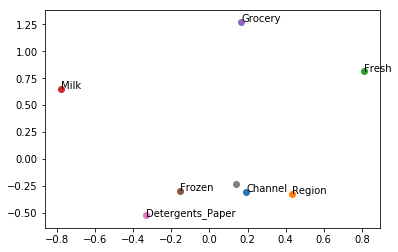

In [53]:
for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    plt.text(i, j, df.columns[:-1][k])
    
plt.show()

In [57]:
#K-means
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [92]:
k_means=KMeans(n_clusters=2)
k_means.fit(X_r)
targets = k_means.labels_
# k_means.cluster_centers_
targets

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [93]:
channel_df = np.array([item - 1 for item in df2])
channel_df

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [94]:
error_rate = 0
for index, item in enumerate(channel_df):
    if item != targets[index]:
        error_rate += 1
        
total_error = 100 * error_rate / len(channel_df)
if total_error > 50:
    print("ERROR RATE FOR PCA-SCALED DATA IS {:.2f}%.".format(100 - total_error))
else:
    print("ERROR RATE FOR PCA-SCALED DATA IS {:.2f}%.".format(total_error))

ERROR RATE FOR PCA-SCALED DATA IS 22.95%.


Challenge:_ Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were. Which did better--scaled data, or data transformed by PCA?

In [101]:
cmat = confusion_matrix(targets, channel_df)
cmat

array([[  2,  43],
       [296,  99]])

In [100]:
confusion_matrix?